## Introduction

The primary objective is to develop a prototype for a data visualization component. This component is designed to showcase the mapped relationships between various land attributes and the Sustainable Development Goals (SDGs). These visualizations are essential for understanding the intricate connections between environmental factors and global development goals. With a focus on biodiversity hotspots, climate zones, soil resources, and agroecological zones, this notebook aims to provide an in-depth visual exploration of these relationships.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the datasets
world_soil_resources = gpd.read_file("Mapped_World_Soil_Resources.geojson")
ipcc_climate_zone = gpd.read_file("Mapped_IPCC_ClimateZoneMap.geojson")
ci_biodiversity = gpd.read_file("CI_BiodiversityHotspots_Mapped.geojson")

In [3]:
gaez_data = gpd.read_file("Downloads/Mapped_GlobalAgroEcologicalZones_GAEZ.geojson")

### Agroecological Zones Visualization

Agroecological zones represent areas with similar agricultural potential and constraints, based on soil properties, climate, and terrain. These zones play a significant role in food production and security, aligning closely with several SDGs.

In [4]:
gaez_data.head()

,Value,SDG_Mapping,geometry
0,1,SDG 2: Zero Hunger,"POLYGON ((-33.50000 83.65000, -33.50000 83.500..."
1,1,SDG 2: Zero Hunger,"POLYGON ((-37.85000 83.60000, -37.85000 83.500..."
2,1,SDG 2: Zero Hunger,"POLYGON ((-32.35000 83.60000, -32.35000 83.500..."
3,1,SDG 2: Zero Hunger,"POLYGON ((-31.25000 83.60000, -31.25000 83.500..."
4,1,SDG 2: Zero Hunger,"POLYGON ((-34.25000 83.60000, -34.25000 83.500..."


In [5]:
mapped_gaez = gaez_data.copy()

In [6]:
# Create a dictionary mapping the value numbers to their respective names
gaez_mapping = {
    1 : "Steep terrain",
    2 : "Artic/Cold",
    3 : "Desert/Arid",
    4 : "Irrigated Soils",
    5 : "Hydromorphic soils",
    6 : "Dry, good soils",
    7 : "Dry, moderate soils",
    8 : "Dry, poor soils",
    9 : "Moist, good soils",
   10 : "Moist, moderate soils",
   11 : "Moist, poor soils",
   12 : "Sub-humid, good soils",
   13 : "Sub-humid, moderate soils",
   14 : "Sub-humid, poor soils",
   15 : "Humid, good soils",
   16 : "Humid, moderate soils",
   17 : "Humid, poor soils",
   18 : "Water"
}

# Replace the numbers in the CLASS_NAME column with their corresponding names
mapped_gaez['Value'] = mapped_gaez['Value'].replace(gaez_mapping)


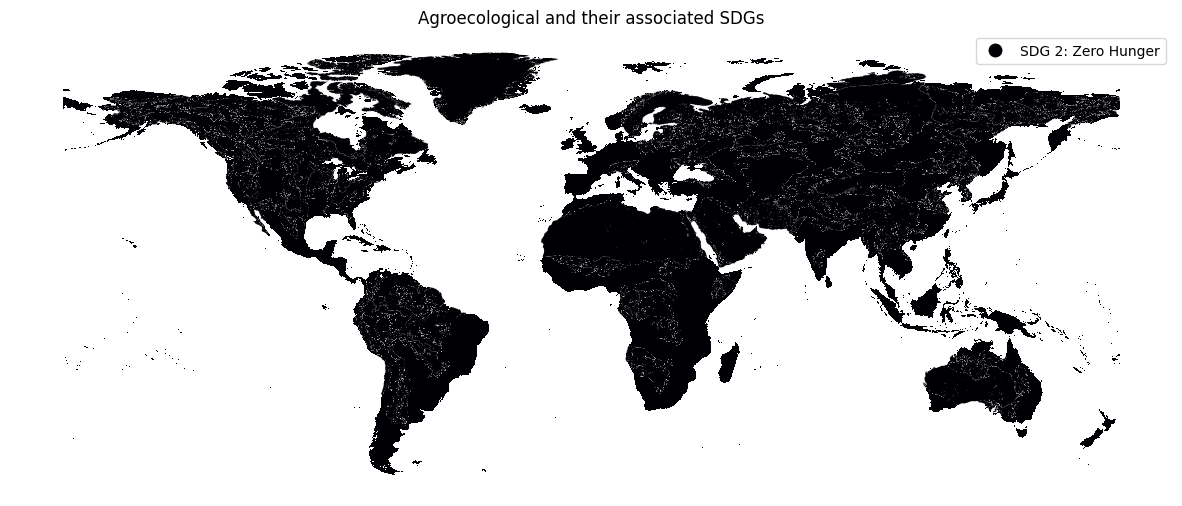

In [7]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the agroecological with SDG mapping as legend
mapped_gaez.plot(ax=ax, column='SDG_Mapping', legend=True, cmap='magma', legend_kwds={'bbox_to_anchor': (1, 1)})

# Set title
ax.set_title("Agroecological and their associated SDGs")

# Remove axis for better visualization
ax.set_axis_off()

plt.show()


### Biodiversity Hotspots Visualization

Biodiversity hotspots are regions that combine high levels of endemism with severe threat due to significant habitat loss. Representing these areas visually provides insights into regions that are ecologically rich and under threat, and their relation to the SDGs - Life on Land and Life under Water.

In [8]:
ci_biodiversity.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,SDG_Mapping,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,SDG 15: Life on Land,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,SDG 15: Life on Land,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,SDG 15: Life on Land,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,SDG 15: Life on Land,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,SDG 14: Life Below Water,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


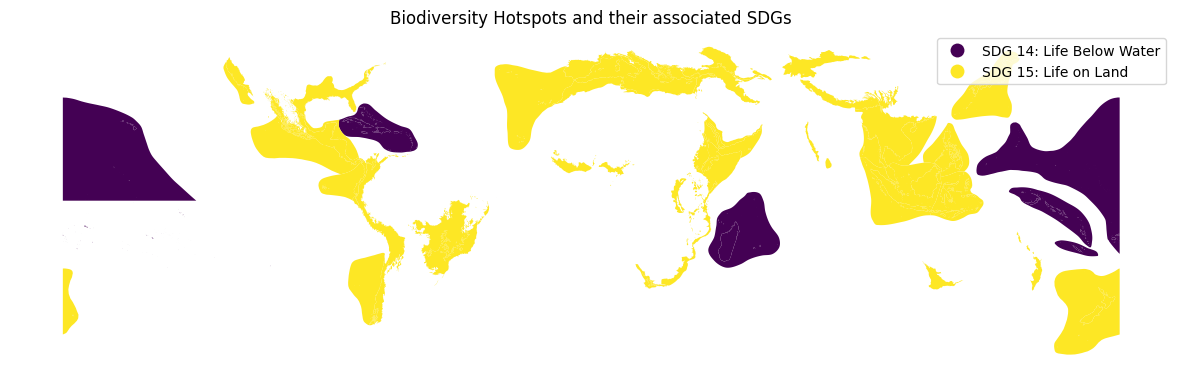

In [9]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the hotspots with SDG mapping as legend
ci_biodiversity.plot(ax=ax, column='SDG_Mapping', legend=True, cmap='viridis', legend_kwds={'bbox_to_anchor': (1, 1)})

# Set title
ax.set_title("Biodiversity Hotspots and their associated SDGs")

# Remove axis for better visualization
ax.set_axis_off()

plt.show()


### Climate Zones Visualization

Climate zones are areas with distinct climates, which can be classified based on patterns of temperature, humidity, air pressure, and other meteorological factors. Understanding these zones is crucial for various environmental and developmental initiatives aligned with the SDGs.



In [10]:
ipcc_climate_zone.head()

,CLASS_NAME,SDG_Mapping,geometry
0,0,SDG 13: Climate Action,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,SDG 13: Climate Action,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,SDG 13: Climate Action,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,SDG 13: Climate Action,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,SDG 13: Climate Action,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


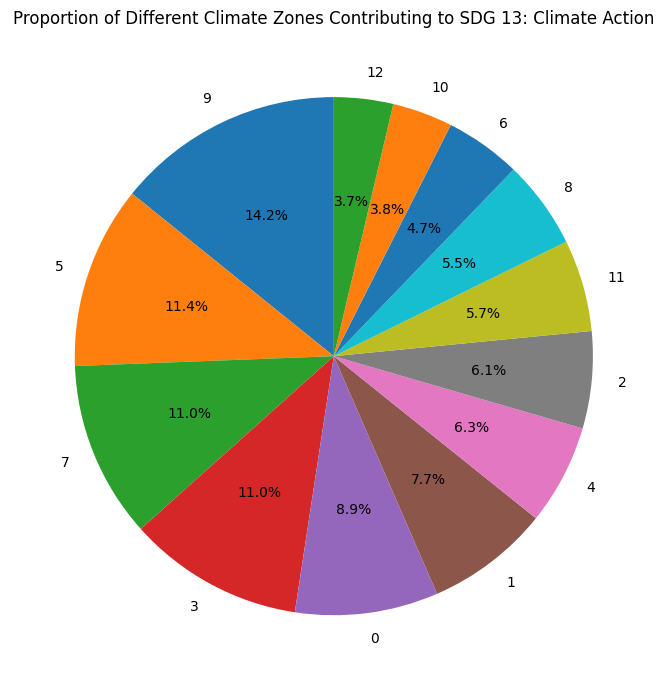

In [11]:
# Pie chart showing the proportion of different climate zones contributing to the "SDG 13: Climate Action"
climate_zone_distribution = ipcc_climate_zone['CLASS_NAME'].value_counts()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 7))
climate_zone_distribution.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
ax.set_title("Proportion of Different Climate Zones Contributing to SDG 13: Climate Action")
ax.set_ylabel("") 

plt.tight_layout()
plt.show()


In [12]:
mapped_climate = ipcc_climate_zone.copy()

In [13]:
# Create a dictionary mapping the class numbers to their respective names
climate_zone_mapping = {
    0: "Not Defined",
    1 : "Warm Temperate Moist",
    2 : "Warm Temperate Dry",
    3 : "Cool Temperate Moist",
    4 : "Cool Temperate Dry",
    5 : "Polar Moist",
    6 : "Polar Dry",
    7 : "Boreal Moist",
    8 : "Boreal Dry",
    9 : "Tropical Montane",
   10 : "Tropical Wet",
   11 : "Tropical Moist",
   12 : "Tropical Dry"
}

# Replace the numbers in the CLASS_NAME column with their corresponding names
mapped_climate['CLASS_NAME'] = mapped_climate['CLASS_NAME'].replace(climate_zone_mapping)

### Soil Resources Visualization

Soil resources are pivotal for agriculture, water filtration, and carbon sequestration. By visualizing these resources, we can better appreciate the global distribution of different soil types and their significance in achieving the SDGs.

In [14]:
world_soil_resources.head()

,SNAME,IPCC,SDG_Mapping,geometry
0,AB,Albeluvisol,SDG 15: Life on Land,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,SDG 15: Life on Land,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,AN,Andosol,SDG 15: Life on Land,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,AR,Arenosol,SDG 15: Life on Land,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,AT,Anthrosol,SDG 15: Life on Land,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


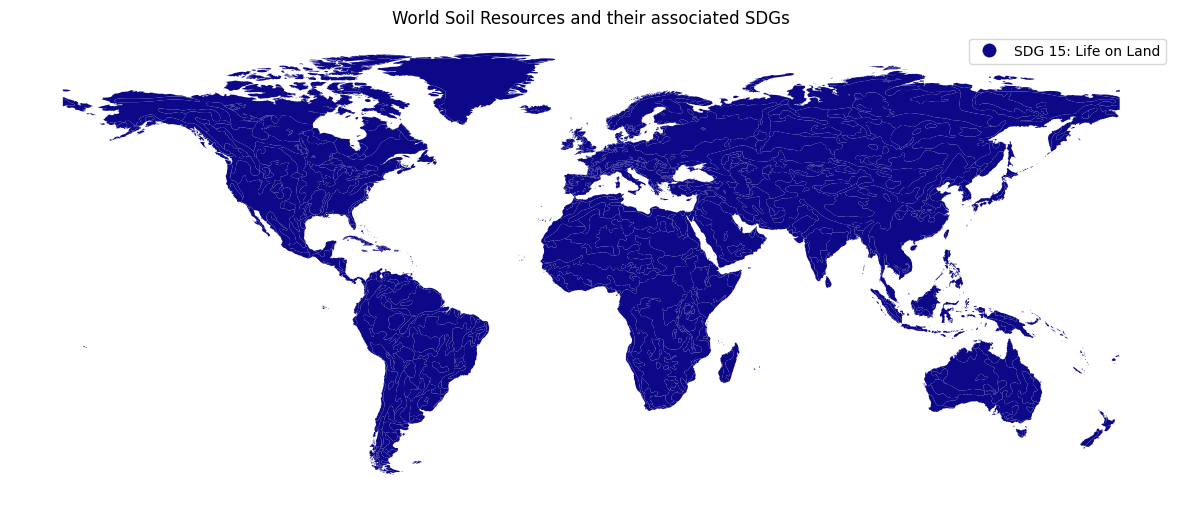

In [15]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the soil resources with SDG mapping as legend
world_soil_resources.plot(ax=ax, column='SDG_Mapping', legend=True, cmap='plasma', legend_kwds={'bbox_to_anchor': (1, 1)})

# Set title
ax.set_title("World Soil Resources and their associated SDGs")

# Remove axis for better visualization
ax.set_axis_off()

plt.show()


Here's a visualization of the world soil resources, all of which are associated with "SDG 15: Life on Land" as shown by the uniform color.

### Combined Overlay Visualization

* Overlay Biodiversity Hotspots on the World Map: This will give a visual representation of where these hotspots are.

* Overlay IPCC Climate Zones: This will help to understand the climate context of these biodiversity hotspots.

* Overlay World Soil Resources: Soil is a key factor in biodiversity, and this overlay will provide insights into the soil types in these hotspots.

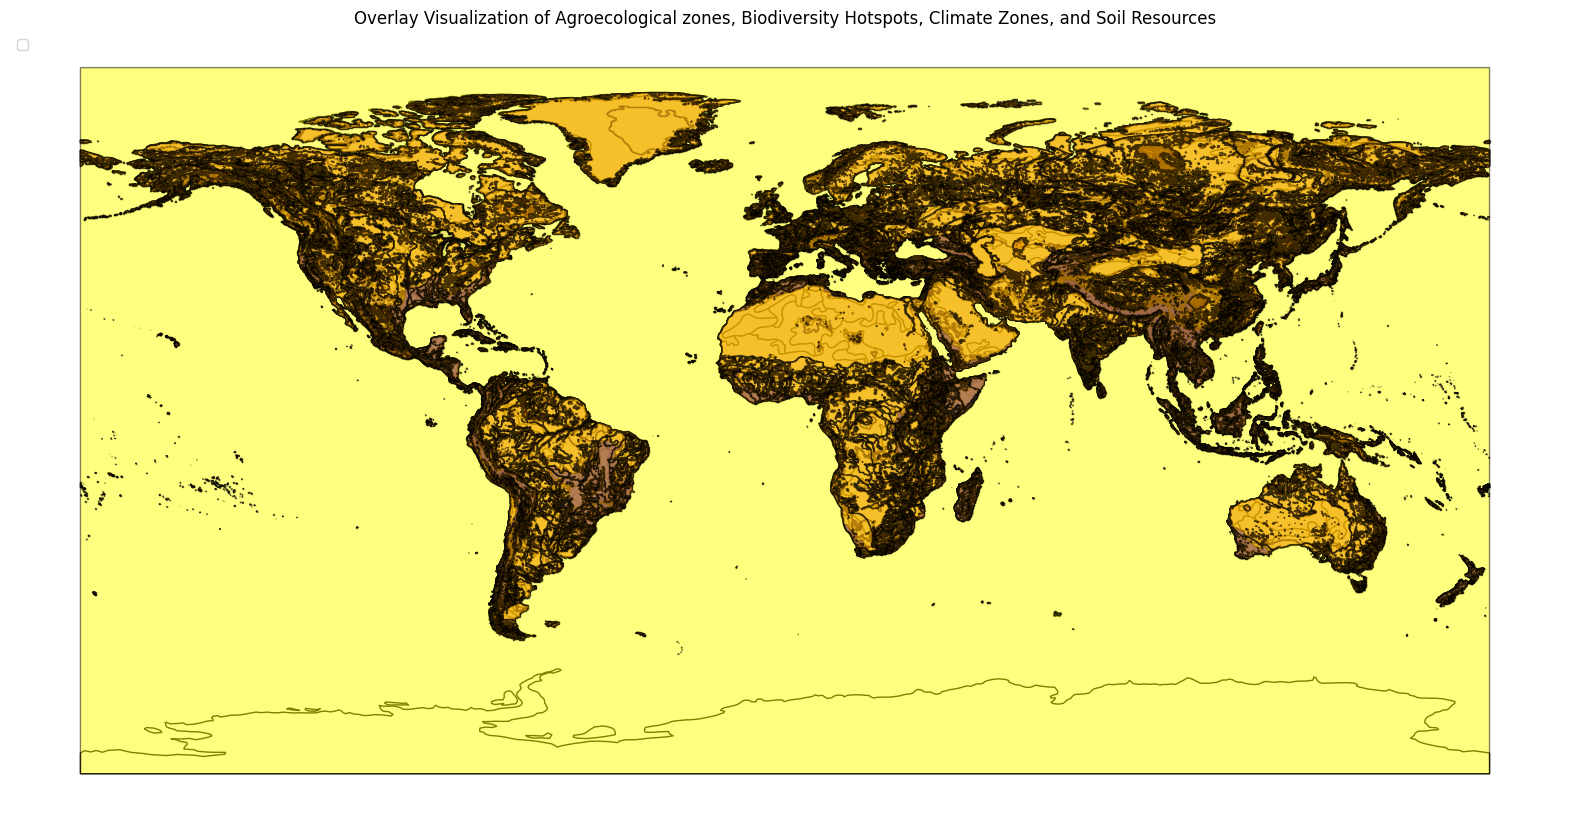

In [16]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the world map as a base layer
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color="black", zorder=1)

mapped_gaez.plot(ax=ax, color='orange', edgecolor='k', zorder=5, label="Agroecological Zones", alpha=0.6)

# Overlay the soil resources
world_soil_resources.plot(ax=ax, color='lightgray', edgecolor='k', zorder=2, label="Soil Resources")

# Overlay the climate zones
mapped_climate.plot(ax=ax, color='yellow', edgecolor='k', zorder=3, label="Climate Zones", alpha=0.5)

# Overlay the biodiversity hotspots
ci_biodiversity[ci_biodiversity["Type"] == "hotspot area"].plot(ax=ax, color='blue', edgecolor='k', zorder=4, label="Biodiversity Hotspots", alpha=0.7)

# Setting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left')

# Set title and remove axis for better visualization
ax.set_title("Overlay Visualization of Agroecological zones, Biodiversity Hotspots, Climate Zones, and Soil Resources")
ax.set_axis_off()

plt.show()


This visualization provides an overview of how Agroecological zones, biodiversity hotspots, climate zones, and soil resources intersect across the world.

### Visualization Prototype

The culmination of our visual exploration is the development of an interactive prototype. This tool overlays all the datasets, allowing users to explore the relationships between different land attributes and their associated SDGs. By integrating search, filter, and data addition functionalities, this prototype offers a comprehensive platform for users to understand and analyze the interconnectedness of environment and development.

In [17]:
# Create base map
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodb positron")

# add agro-ecological layer
folium.GeoJson(
    mapped_gaez,
    name='Global Agro-Ecological Zones',
    style_function=lambda x: {'fillColor': 'red', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['Value', 'SDG_Mapping'],
                                  aliases=['Zone Name:', 'Associated SDG:'])
).add_to(m)

# Add Biodiversity Hotspots layer
folium.GeoJson(
    ci_biodiversity,
    name='Biodiversity Hotspots',
    style_function=lambda x: {'fillColor': 'blue', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['NAME', 'SDG_Mapping'],
                                  aliases=['Hotspot Name:', 'Associated SDG:'])
).add_to(m)

# Add Climate Zones layer
folium.GeoJson(
    mapped_climate,
    name='Climate Zones',
    style_function=lambda x: {'fillColor': 'yellow', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['CLASS_NAME', 'SDG_Mapping'],
                                  aliases=['Climate Class:', 'Associated SDG:'])
).add_to(m)

# Add Soil Resources layer
folium.GeoJson(
    world_soil_resources,
    name='Soil Resources',
    style_function=lambda x: {'fillColor': 'green', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['IPCC', 'SDG_Mapping'],
                                  aliases=['Soil Name:', 'Associated SDG:'])
).add_to(m)

# Add layer control to toggle between layers
folium.LayerControl().add_to(m)




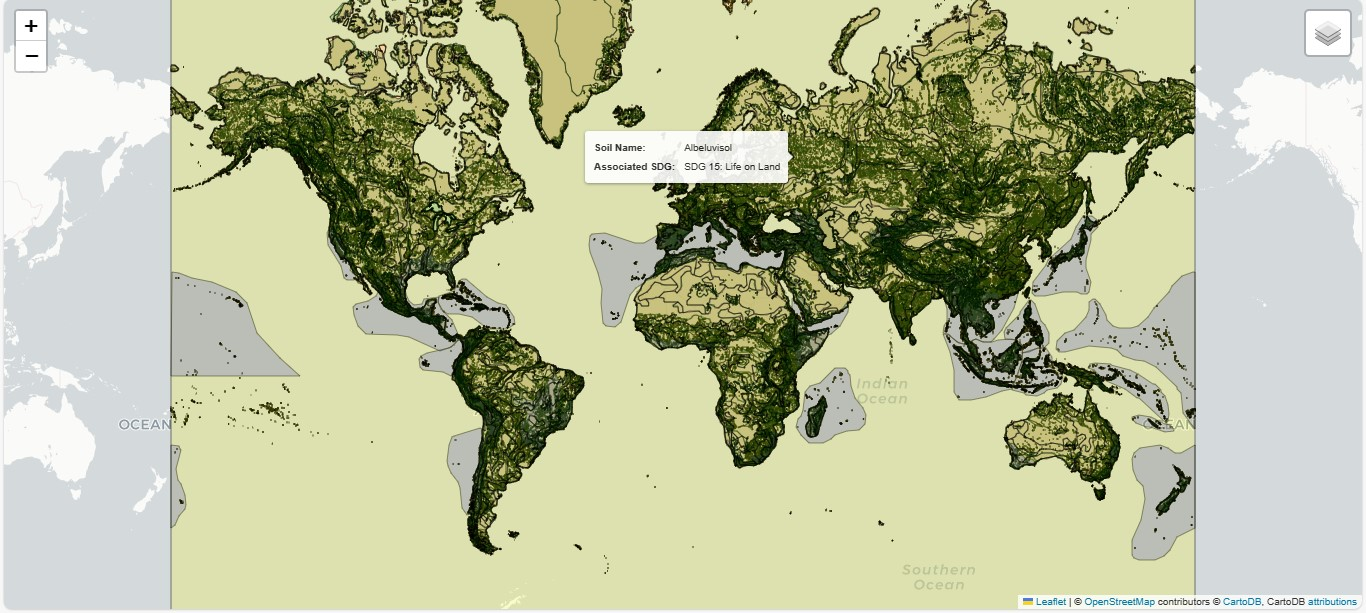

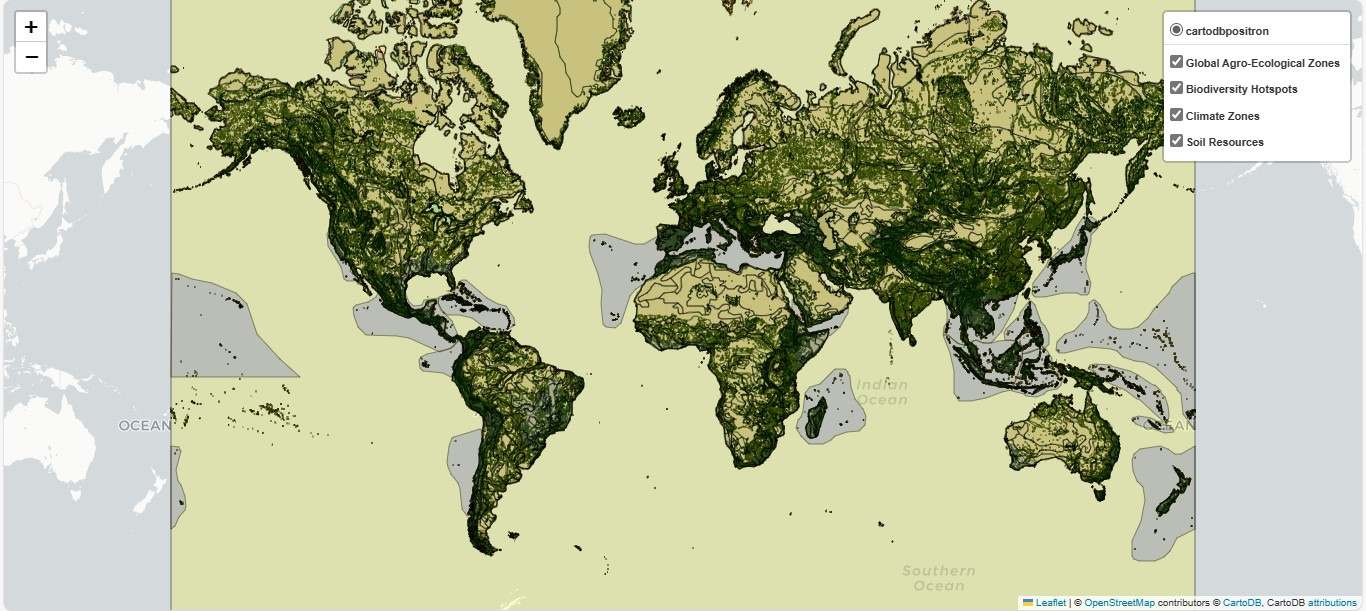

Unable to show output because its making the notebook file large, so this is the screenshot of the interactive map prototype created with the code above

In [19]:
def search_hotspots(query=""):
    if not query:
        return ci_biodiversity[['NAME', 'SDG_Mapping']].head()
    else:
        return ci_biodiversity[ci_biodiversity['NAME'].str.contains(query, case=False)][['NAME', 'SDG_Mapping']]

def filter_by_sdg(sdg=""):
    if not sdg:
        return ci_biodiversity[['NAME', 'SDG_Mapping']].head()
    else:
        return ci_biodiversity[ci_biodiversity['SDG_Mapping'] == sdg][['NAME', 'SDG_Mapping']]

def integrate_data(file_path):
    try:
        new_data = gpd.read_file(file_path)
        return new_data.head()
    except Exception as e:
        return f"Error reading the file: {e}"


In [20]:
# Search functionality widget
search_input = widgets.Text(
    value='',
    placeholder='Enter hotspot name...',
    description='Search:',
    disabled=False
)
search_button = widgets.Button(description="Search")
search_output = widgets.Output()

def on_search_button_click(b):
    with search_output:
        clear_output(wait=True)
        query = search_input.value
        result = search_hotspots(query)
        display(result)

search_button.on_click(on_search_button_click)
display(search_input, search_button, search_output)

# Filtering by SDG Widget
sdg_options = [''] + list(ci_biodiversity['SDG_Mapping'].unique())
sdg_dropdown = widgets.Dropdown(
    options=sdg_options,
    value='',
    description='Filter by SDG:',
    disabled=False
)
sdg_filter_output = widgets.Output()

def on_sdg_change(change):
    with sdg_filter_output:
        clear_output(wait=True)
        sdg = change['new']
        result = filter_by_sdg(sdg)
        display(result)

sdg_dropdown.observe(on_sdg_change, names='value')
display(sdg_dropdown, sdg_filter_output)

# Data Integration Widget
upload_button = widgets.FileUpload(
    accept='.geojson',
    multiple=False,
    description='Upload GeoJSON'
)
data_integration_output = widgets.Output()

def on_file_upload(change):
    with data_integration_output:
        clear_output(wait=True)
        uploaded_file = list(upload_button.value.values())[0]
        content = uploaded_file['content']
        with open('uploaded_data.geojson', 'wb') as f:
            f.write(content)
        result = integrate_data('uploaded_data.geojson')
        display(result)

upload_button.observe(on_file_upload, names='value')
display(upload_button, data_integration_output)

Text(value='', description='Search:', placeholder='Enter hotspot name...')

Button(description='Search', style=ButtonStyle())

Output()

Dropdown(description='Filter by SDG:', options=('', 'SDG 15: Life on Land', 'SDG 14: Life Below Water'), value…

Output()

FileUpload(value=(), accept='.geojson', description='Upload GeoJSON')

Output()

* Multi-layered Visualization: The interactive map provides an overlay of biodiversity hotspots, climate zones, and soil resources, giving stakeholders a spatial understanding of the land attributes in relation to SDGs.
* Detail on Demand: The use of tooltips in the map allows stakeholders to click on specific regions to get more detailed information, enhancing interactivity.
* Flexibility: The Python functions for search, filtering, and data integration emulate functionalities that can be further developed and refined in a web application.

### Conclusion

Through the course of Task 4, I have delved deep into the visual representation of land attributes and their association with the Sustainable Development Goals. These visualizations not only enhance our understanding of global environmental patterns but also underscore the importance of sustainable practices in preserving these crucial resources. As we move forward, it's imperative to use such insights to guide policies, research, and initiatives aimed at a more sustainable and inclusive future.

